### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [124]:
data = pd.read_csv('data/coupons.csv')

In [125]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [126]:
data.info()
data.isnull().sum()
#data.groupby('car')['temperature'].count()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189

No useful information in the car column and can be removed from the dataset. For all the other columns remove rows with NaNs.

3. Decide what to do about your missing data -- drop, replace, other...

In [127]:
data = data.drop('car', axis=1)
data = data.dropna()

4. What proportion of the total observations chose to accept the coupon? 



In [128]:
data['Y'].mean()


0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Coupons to be used at and the count')

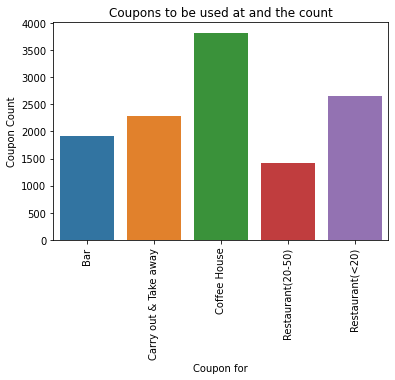

In [129]:
coupon_count = data.groupby('coupon')['passanger'].count().reset_index()
fig,ax = plt.subplots()
sns.barplot(x='coupon', y='passanger', data=coupon_count)
plt.xticks(rotation='90')
ax.set_ylabel('Coupon Count')
ax.set_xlabel("Coupon for")
ax.set_title('Coupons to be used at and the count')


6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Histogram of Temperature')

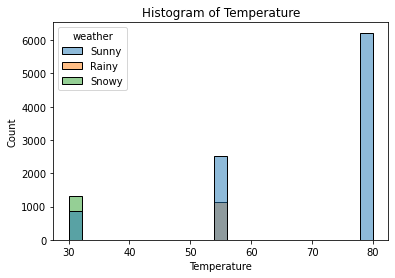

In [130]:
fig,ax = plt.subplots()
sns.histplot(data, x='temperature', hue='weather')
ax.set_xlabel('Temperature')
ax.set_title('Histogram of Temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [131]:
bar_data = data.loc[data['coupon']== 'Bar']


2. What proportion of bar coupons were accepted?


In [132]:
(bar_data['Y']).mean()


0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Text(0, 0.5, 'Rate of Acceptance')

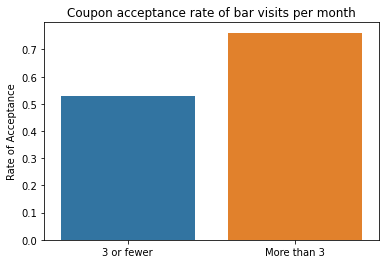

In [133]:
visit_bar_lte3 = bar_data.loc[(bar_data['Bar'] == '1~3') | (bar_data['Bar'] == 'less1')]['Y'].mean()
visit_bar_gt3 = bar_data.loc[(bar_data['Bar'] == '4~8') | (bar_data['Bar'] == 'gt8')]['Y'].mean()
sns.barplot(x=['3 or fewer', 'More than 3'],y= [visit_bar_lte3, visit_bar_gt3])
plt.title('Coupon acceptance rate of bar visits per month')
plt.ylabel("Rate of Acceptance")

In [134]:
bar_data.groupby('age')['Y'].mean()

age
21         0.503778
26         0.486413
31         0.376543
36         0.306122
41         0.438596
46         0.368932
50plus     0.293040
below21    0.419753
Name: Y, dtype: float64

Age Column cleanup:
Replace 50plus with 51 and below21 with 20. While 51 maintains the interval between other age groups, 20 is probably a better number given the restrictions on drinking if bar visits are assumed for that purpose. No matter what the number the relevance for this analysis is low.

In [135]:
bar_data['age_cleaned'] = bar_data['age'].str.replace('50plus','51').str.replace('below21', '20')

/var/folders/j7/rmnhy5sn3_j7y7g0phl3hzvm0000gn/T/ipykernel_75075/3909033179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_data['age_cleaned'] = bar_data['age'].str.replace('50plus','51').str.replace('below21', '20')


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Text(0, 0.5, 'Rate of Acceptance')

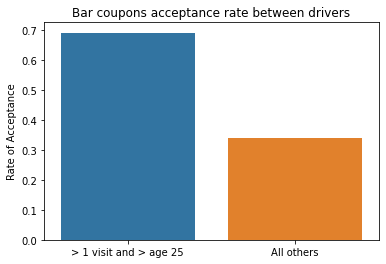

In [136]:
drivers_gt1permo_gt25_rate = bar_data.loc[((bar_data['Bar']== '1~3') | (bar_data['Bar']== '4~8') | (bar_data['Bar']== 'gt8')) & (bar_data['age_cleaned'].astype('int64') > 25)]['Y'].mean()

all_others_rate = bar_data.loc[((bar_data['Bar']== '1~3') | (bar_data['Bar']== '4~8') | (bar_data['Bar']== 'gt8')) & (bar_data['age_cleaned'].astype('int64') > 25) == False]['Y'].mean()
sns.barplot(x=['> 1 visit and > age 25', 'All others'], y=[drivers_gt1permo_gt25_rate,all_others_rate])
plt.title('Bar coupons acceptance rate between drivers')
plt.ylabel("Rate of Acceptance")




5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [137]:
#Understanding the acceptance rate in general between drivers with different passengers
bar_data.groupby('passanger')['Y'].mean()

passanger
Alone        0.409290
Friend(s)    0.566038
Kid(s)       0.206186
Partner      0.388462
Name: Y, dtype: float64

In [138]:
#understanding the acceptance rate between drivers with different occupation
bar_data.groupby('occupation')['Y'].mean().sort_values()

occupation
Retired                                      0.253521
Transportation & Material Moving             0.257143
Building & Grounds Cleaning & Maintenance    0.285714
Unemployed                                   0.297945
Education&Training&Library                   0.304000
Community & Social Services                  0.325000
Arts Design Entertainment Sports & Media     0.329545
Legal                                        0.352941
Computer & Mathematical                      0.355556
Personal Care & Service                      0.400000
Installation Maintenance & Repair            0.444444
Farming Fishing & Forestry                   0.444444
Healthcare Practitioners & Technical         0.444444
Sales & Related                              0.445714
Food Preparation & Serving Related           0.465116
Student                                      0.481013
Protective Service                           0.481481
Office & Administrative Support              0.495050
Business & Financ

Text(0, 0.5, 'Rate of Acceptance')

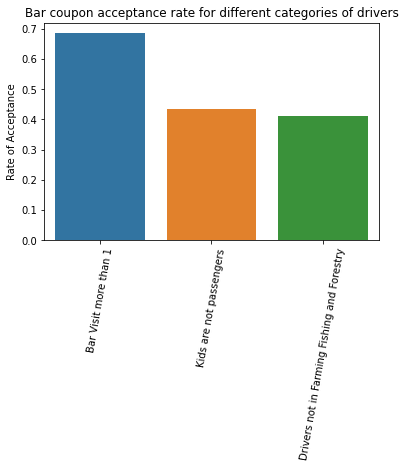

In [139]:
drivers_gte1_rate = bar_data.loc[((bar_data['Bar']== '1~3') | (bar_data['Bar']== '4~8') | (bar_data['Bar']== 'gt8')) ]['Y'].mean()
driv_nokids_rate = bar_data.loc[bar_data['passanger'] != 'Kid(s)']['Y'].mean()
drivers_nofff_rate = bar_data.loc[bar_data['occupation'] != 'Farming Fishing & Forestry']['Y'].mean()

sns.barplot(x=['Bar Visit more than 1', 'Kids are not passengers', 'Drivers not in Farming Fishing and Forestry'],y=[drivers_gte1_rate,driv_nokids_rate, drivers_nofff_rate])
plt.xticks(rotation='80')
plt.title('Bar coupon acceptance rate for different categories of drivers')
plt.ylabel("Rate of Acceptance")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [140]:
#Understanding marital status and acceptance rate among bar coupon accepted drivers
bar_data.groupby('maritalStatus')['Y'].mean()

maritalStatus
Divorced             0.232877
Married partner      0.325330
Single               0.553292
Unmarried partner    0.397727
Widowed              0.411765
Name: Y, dtype: float64

In [141]:
#Understanding cheaper restaurant visitors and acceptance rate among bar coupon accepted drivers
bar_data.groupby('RestaurantLessThan20')['Y'].mean()

RestaurantLessThan20
1~3      0.402861
4~8      0.419708
gt8      0.456989
less1    0.381410
never    0.571429
Name: Y, dtype: float64

In [142]:
#Understanding income and acceptance rate among bar coupon accepted drivers
bar_data.groupby('income')['Y'].mean().sort_values()


income
$87500 - $99999     0.293233
$62500 - $74999     0.356589
$37500 - $49999     0.364372
$75000 - $87499     0.377622
$50000 - $62499     0.405622
$12500 - $24999     0.420664
$25000 - $37499     0.453333
Less than $12500    0.459119
$100000 or More     0.478723
Name: Y, dtype: float64

Text(0, 0.5, 'Rate of Acceptance')

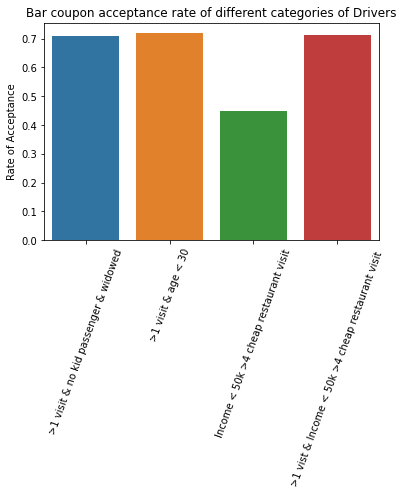

In [143]:
# Acceptance column for Drivers that visited a bar more than once a month and 
# with no kids as passengers and were not widowed
nokids_widowed = bar_data.loc[((bar_data['Bar']== '1~3') | (bar_data['Bar']== '4~8') | (bar_data['Bar']== 'gt8')) & (bar_data['passanger'] != 'Kid(s)') & (bar_data['maritalStatus'] != 'Widowed')]['Y'].mean()


#Acceptance column for Drivers that visited a bar more than once a month and age less than 30
driv_lt30 = bar_data.loc[((bar_data['Bar']== '1~3') | (bar_data['Bar']== '4~8') | (bar_data['Bar']== 'gt8')) & (bar_data['age_cleaned'].astype('int64') < 30)]['Y']
#rate of acceptance for the above
driv_lt30_rate = driv_lt30.mean()

#Drivers that had income less than 50,000 and visited cheaper restaurants more than 4 times 
driv_cheap_50k = bar_data.loc[(bar_data['income'] == 'Less than $12500') | 
                                      (bar_data['income'] == '$12500 - $24999') |
                                      (bar_data['income'] == '$25000 - $37499') | 
                                      (bar_data['income'] == '$37500 - $49999') & 
                          ((bar_data['RestaurantLessThan20']== '4~8') | (bar_data['RestaurantLessThan20']== 'gt8'))]['Y']
driv_cheap_50k_rate = driv_cheap_50k.mean()

#Drivers that visited a bar more than once a month, had an income less than 50,000 and visited cheaper restaurants 
# more than 4 times
drivers_oncemore = bar_data.loc[((bar_data['Bar']== '1~3') | (bar_data['Bar']== '4~8') | (bar_data['Bar']== 'gt8'))]
driv_cheap_bar_50k = drivers_oncemore.loc[(drivers_oncemore['income'] == 'Less than $12500') | 
                                      (drivers_oncemore['income'] == '$12500 - $24999') |
                                      (drivers_oncemore['income'] == '$25000 - $37499') | 
                                      (drivers_oncemore['income'] == '$37500 - $49999') & 
                          ((drivers_oncemore['RestaurantLessThan20']== '4~8') | (drivers_oncemore['RestaurantLessThan20']== 'gt8'))]['Y']
driv_cheap_50k_bar_rate = driv_cheap_bar_50k.mean()
sns.barplot(x=['>1 visit & no kid passenger & widowed','>1 visit & age < 30','Income < 50k >4 cheap restaurant visit','>1 vist & Income < 50k >4 cheap restaurant visit '],y=[nokids_widowed,driv_lt30_rate, driv_cheap_50k_rate,driv_cheap_50k_bar_rate])
plt.title('Bar coupon acceptance rate of different categories of Drivers')
plt.xticks(rotation='70')
plt.ylabel("Rate of Acceptance")

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

1. Approximately 4 out of 10 drivers accpeted bar coupons.
2. People who drive to the bar more than once a month and visit cheaper restaurants more than 4 times a month with incomes less than 50k have a higher rate of coupon acceptance compared to the average of all drivers who visit cheaper restaurants more than 4 times a month and had incomes less than 50k. 
3. People who visit bars more than once a month tend to accept bar coupons at a higher rate than people who visit bars less than once a month while people who visited the bar 3 times or less accepted the coupons about 5 times more than people who visited the bar more than 3 times.  
4. Drivers that visit bar tend to accept less coupons than drivers that visit other places.

Typically, drivers who accept bar coupons are young, are single, visit cheaper restaurants more often and visit bars more than once a month.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [144]:
# Get data for coffehouse coupons
coffee_data = data.loc[data['coupon'] == 'Coffee House']

In [145]:
coffee_data.groupby('destination')['Y'].mean()

destination
Home               0.362613
No Urgent Place    0.578178
Work               0.440000
Name: Y, dtype: float64

**Proportion of coffee coupons accepted**

In [146]:
coffee_data['Y'].mean()

0.49633123689727465

**Went to coffee house more than 3 times compared to less than 1 or never**

Text(0, 0.5, 'Acceptance Rate')

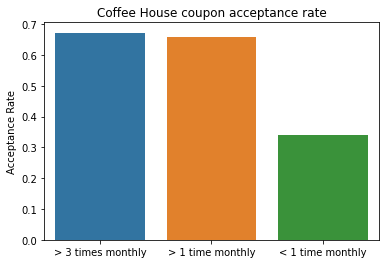

In [147]:
# Drivers who visited coffee house more than once and accepted coupons for coffee house
coffee_gt1 = coffee_data.loc[(coffee_data['CoffeeHouse'] == '1~3') | (coffee_data['CoffeeHouse'] == '4~8') | (coffee_data['CoffeeHouse'] == 'gt8')]
# Drivers who visited coffee house more than 3 times and accepted coupons for coffee house
coffee_gt3 = coffee_data.loc[(coffee_data['CoffeeHouse'] == '4~8') | (coffee_data['CoffeeHouse'] == 'gt8')]
# Drivers who never visited coffee house or less than once a month and accepted coupons for coffee house
coffee_lt1 = coffee_data.loc[(coffee_data['CoffeeHouse'] == 'less1') | (coffee_data['CoffeeHouse'] == 'never')]
sns.barplot(x=['> 3 times monthly','> 1 time monthly','< 1 time monthly'], y = [coffee_gt3['Y'].mean(),  coffee_gt1['Y'].mean(),coffee_lt1['Y'].mean()])
plt.title('Coffee House coupon acceptance rate')
plt.ylabel('Acceptance Rate')

**Had income of more than $100,000 and occupation of Health care Practitioners and Technical**

Text(0, 0.5, 'Acceptance Rate')

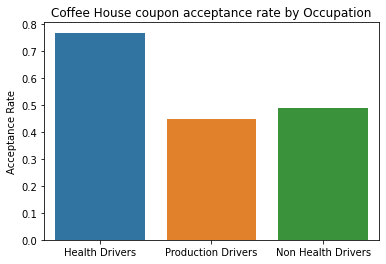

In [148]:
#Drivers who visited coffee house, earned 100,000 or more and were Healthcare Practitioners and Technical 
health_drivers = coffee_data.loc[(coffee_data['income'] == '$100000 or More') & (coffee_data['occupation'] == 'Healthcare Practitioners & Technical')]
#Drivers who visited coffee house and were Production Occupations 
production_drivers = coffee_data.loc[(coffee_data['occupation'] == 'Production Occupations')]
#Drivers who visited coffee house and were in occupations other than Healthcare Practitioners and Technical
non_health_drivers = coffee_data.loc[(coffee_data['occupation'] != 'Healthcare Practitioners & Technical')]
sns.barplot(x=['Health Drivers','Production Drivers','Non Health Drivers'], y= [health_drivers['Y'].mean(),production_drivers['Y'].mean(), non_health_drivers['Y'].mean()])
plt.title('Coffee House coupon acceptance rate by Occupation')
plt.ylabel('Acceptance Rate')

Coffee House coupons follow the same pattern as the bar coupons in that the drivers that visited the coffee house more than once a month accepted coupons more often than drivers that visited a coffee house less than once or never. Drivers with occupation of Healthcare Practitioners and Technical had higher acceptance rate of coffee house coupons compared to Drivers with Production Occupation and an average of all other occupations.